In [ ]:
import pandas as pd
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 


#### Let's analyze the trends in 5 room flats!

It is fairly clear that resale price would depend on many factors. Location, type of room, the year and other external factors such as global events. In this notebook, we can take a look at how 5 room flat resale prices have changed through the years.

#### First, import the data

In [2]:
resale_df = pd.read_csv("../data/processed/resale_df.csv")
resale_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963149 entries, 0 to 963148
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 963149 non-null  int64  
 1   month                963149 non-null  int64  
 2   town                 963149 non-null  object 
 3   flat_type            963149 non-null  object 
 4   block                963149 non-null  object 
 5   street_name          963149 non-null  object 
 6   storey_range         963149 non-null  object 
 7   floor_area_sqm       963149 non-null  float64
 8   flat_model           963149 non-null  object 
 9   lease_commence_date  963149 non-null  int64  
 10  remaining_lease      963149 non-null  float64
 11  resale_price         963149 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 88.2+ MB


In [3]:
# check what the flat types are first 

resale_df["flat_type"].unique()


array(['4 ROOM', '1 ROOM', '3 ROOM', '5 ROOM', 'EXECUTIVE', '2 ROOM',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [5]:
# get the df with only data on 5 room flats

five_room_df = resale_df[resale_df["flat_type"]=='5 ROOM']
five_room_df.shape


(203763, 12)

The data has a total of 203,763 5 room resale flat transactions. We can then look by year and see the distribution of 5 room resale flats transacted by year. 

Text(0.5, 1.0, '5 room resale flat transactions from 1990-2025')

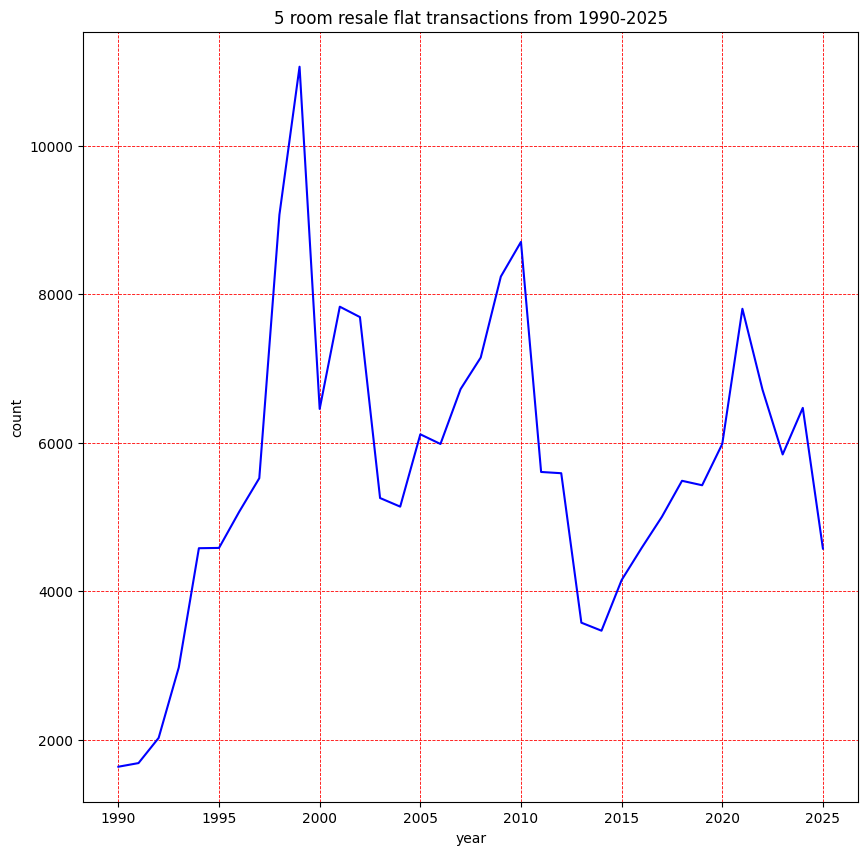

In [9]:
five_room_by_year = five_room_df["year"].value_counts()
fig, ax = plt.subplots(figsize=(10,10))

sns.lineplot(data=five_room_by_year, ax=ax, color="blue", linewidth=1.5)
ax.grid(True, color="red", linestyle="--", linewidth=0.6)
ax.set_title("5 room resale flat transactions from 1990-2025")


There are of course, a few caveats with the above plot. This data was collected in the middle of 2025, so the final numbers for the current year are not confirmed yet. This data was also made available publicly by HDB, however it is not clear if this dataset is exhaustive i.e we are not sure if there are transactions made that were not included in this dataset for whatever reason. 

We can however make an assumption: Suppose **ALL** the transactions for the 5 room flat that were made over the years are present in this dataframe. We can see that from 1995-2000 there was a sharp increase in the number of 5 room sales and subsequently there seems to be a downward trend in the number of 5 room flats sold.  

It would also be interesting to see the remaining lease for the flats sold during this time period. 

Text(0.5, 1.0, 'Remaining lease trend for 5 room flat sales')

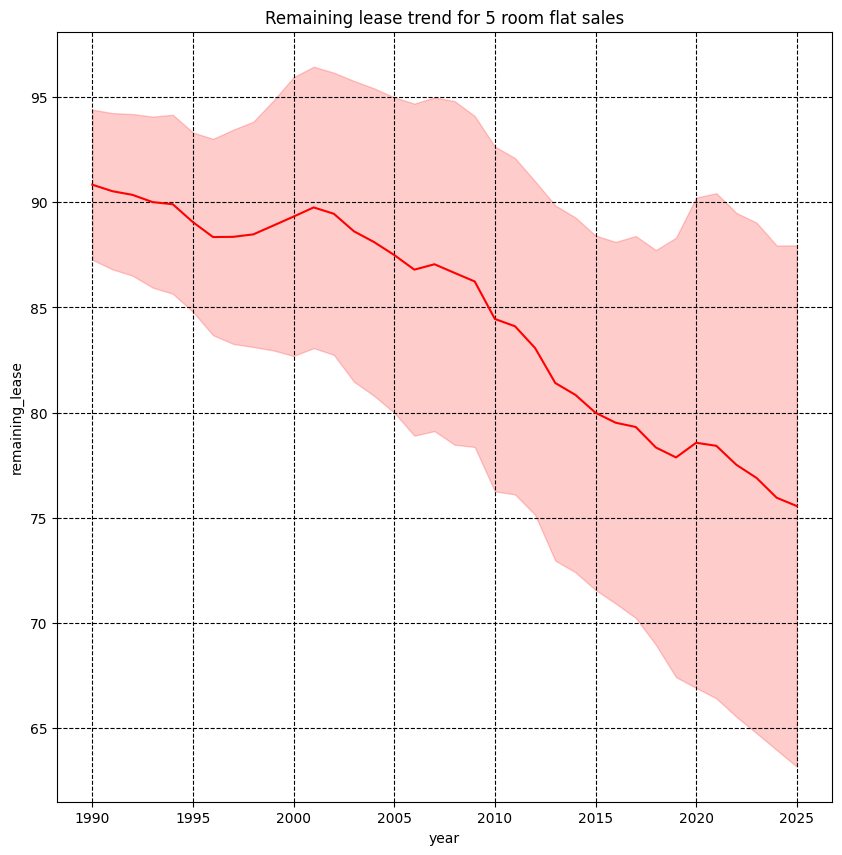

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

sns.lineplot(data=five_room_df, x="year", y="remaining_lease", errorbar="sd", ax=ax, color="red")
ax.grid(True, color="black", linestyle="--")
ax.set_title("Remaining lease trend for 5 room flat sales")


Boxplot might be better here. 

Text(0.5, 1.0, 'Remaining lease trend for 5 room flat sales')

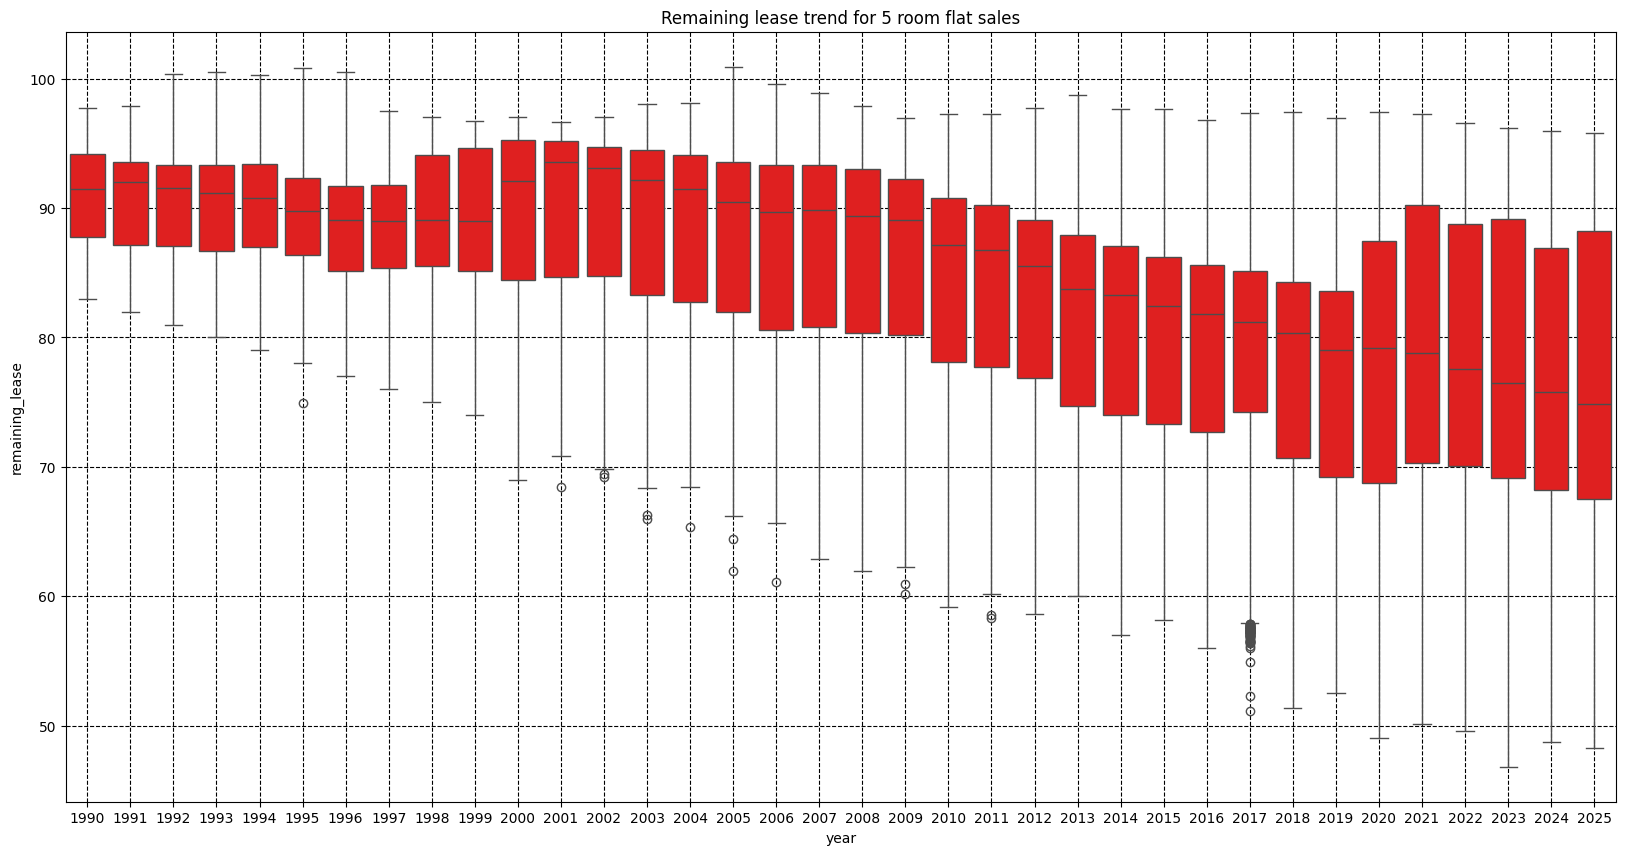

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

sns.boxplot(data=five_room_df, x="year", y="remaining_lease", ax=ax, color="red")
ax.grid(True, color="black", linestyle="--")
ax.set_title("Remaining lease trend for 5 room flat sales")


Over the period, there seems to a clear trend of resale flats being bought with fewer number of years in the remaining lease. The shaded region in the above plot shows $+- \sigma$ for each year in the dataset. 

We can also check if resale 5 room flats are changing in size with the same method. 

In [14]:
# recheck column names
five_room_df.columns


Index(['year', 'month', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

Text(0.5, 1.0, 'Floor square meter trend for 5 room flat sales')

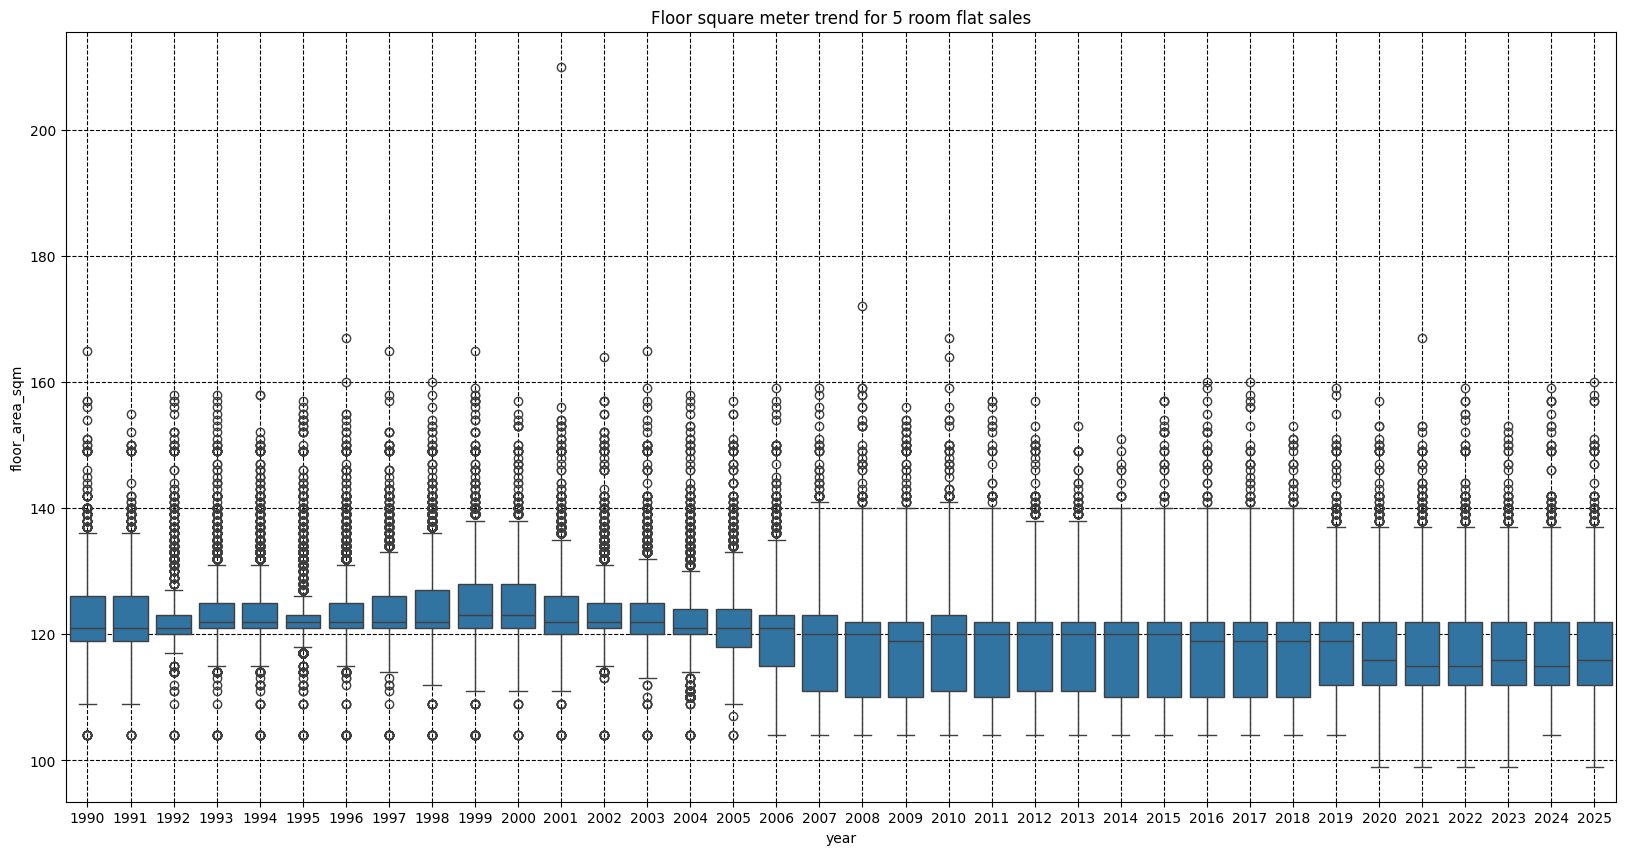

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

sns.boxplot(data=five_room_df, x="year", y="floor_area_sqm", ax=ax)
ax.grid(True, color="black", linestyle="--")
ax.set_title("Floor square meter trend for 5 room flat sales")


The above plot shows that sometime starting in 2000, the size of the 5 room resale flats started to drop and roughly stabilized from 2010 onwards. 

It is generally viewed that higher floor flats and larger aparments are more expensive. We can visualise this relationship through a stripplot. 

/tmp/ipykernel_926730/2276034399.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_room_df["floor_area_catg"] = np.digitize(x=five_room_df["floor_area_sqm"], bins=bin_edges)
/tmp/ipykernel_926730/2276034399.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_room_df["floor_area_catg"] = five_room_df["floor_area_catg"].apply(lambda x: f"Area size {x}")
/tmp/ipykernel_926730/2276034399.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

Text(0.5, 1.0, 'Visualization of storey and flat size with price')

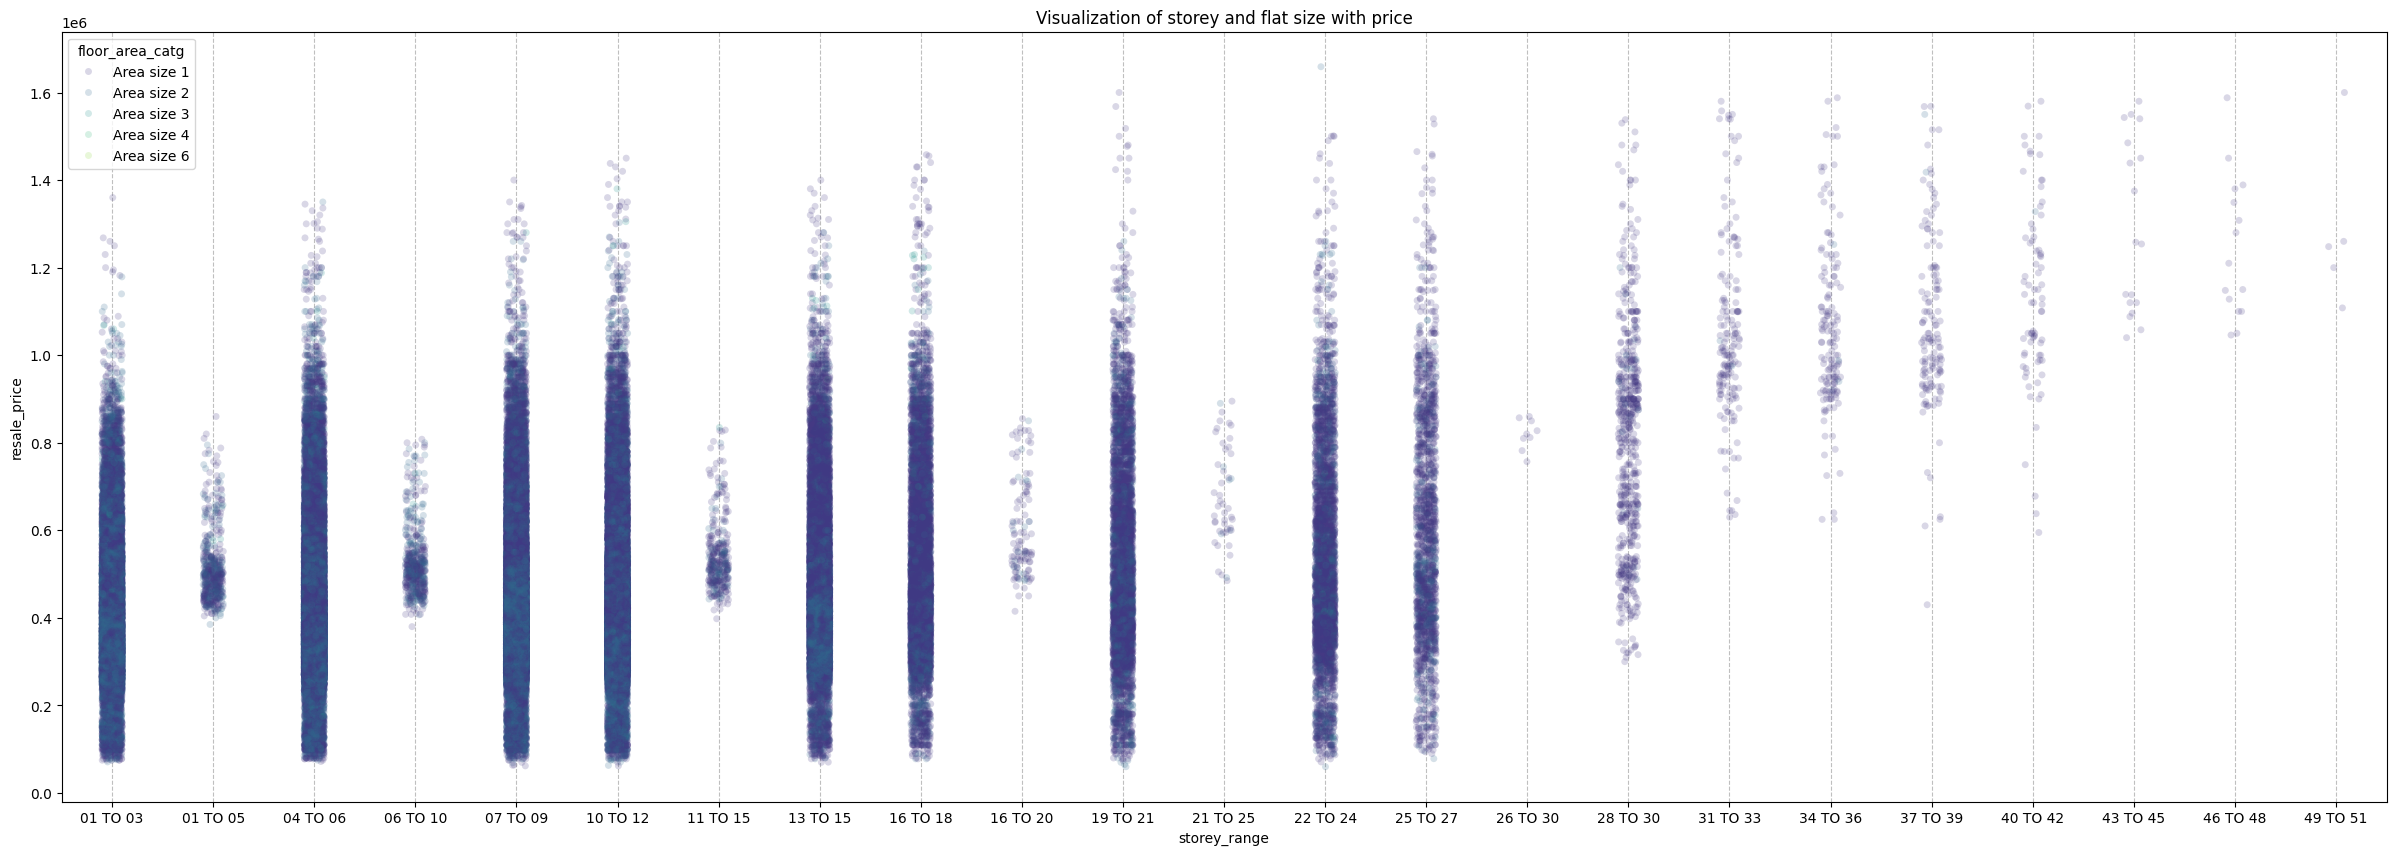

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))

# we first digitize the flat size column 

_, bin_edges = np.histogram(five_room_df["floor_area_sqm"].to_numpy(), bins=5)
five_room_df["floor_area_catg"] = np.digitize(x=five_room_df["floor_area_sqm"], bins=bin_edges)
five_room_df["floor_area_catg"] = five_room_df["floor_area_catg"].apply(lambda x: f"Area size {x}")
five_room_df.sort_values(by="storey_range", inplace=True)

sns.stripplot(data=five_room_df, x="storey_range", y="resale_price", hue="floor_area_catg", ax=ax, jitter=True, palette="viridis", alpha=0.2)
ax.grid(axis='x', linestyle='--', color='gray', alpha=0.5)
ax.set_title("Visualization of storey and flat size with price")
